<a href="https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Example

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

df = pd.read_csv("../Global_Music_Streaming_Listener_Preferences.csv")


What we want to analyze:
- diya - (also eda)
    - top artists
    - top streaming platforms
    - top artists based on platform
- tiffany - 
    - top arists based on country(users)
    - top country(users) based on top artist
    - what country are the artists that are most listened to come from


## Questions we are asking:
* What are the dimensions of the dataset (number of rows and columns)?
* What are the data types of the variables (numerical, categorical, text, etc.)?
* Are there any missing values, and if so, how are they represented?


In [3]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dimensions: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")


Data Structure
---------------
Dimensions: (5000, 12)
Data Types:
User_ID                                      object
Age                                           int64
Country                                      object
Streaming Platform                           object
Top Genre                                    object
Minutes Streamed Per Day                      int64
Number of Songs Liked                         int64
Most Played Artist                           object
Subscription Type                            object
Listening Time (Morning/Afternoon/Night)     object
Discover Weekly Engagement (%)              float64
Repeat Song Rate (%)                        float64
dtype: object
Missing Values:
User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Numb

### Interpretation

This data has 5000 observations of music listeners's activity and trends. Each observation has 12 features describing the listener's demographic/background and listening activity.

The numerical features are:
- Age
- Minutes Streamed Per Days
- Number of Songs Liked
- Discover Weekly Engagement (%)
- Repeat Song Rate (%)

The categorical features are:
- User ID
- Country
- Streaming Platform
- Top Genre
- Most Played Artist
- Subscription Type
- Listening Time (Morning, Afternoon, or Night)

There are no missing values in this dataset, so there is no need to remove rows or columns. 

## Questions we are asking:
* What are the central tendency measures (mean, median, mode) for numerical variables?
* What are the measures of dispersion (range, variance, standard deviation) for numerical variables?
* What is the distribution of the variables (normal, skewed, etc.)?


In [23]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print("------------------------")
print(df[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print("Skew:")
print(df[numeric_columns].skew())
print("\nKurt:")
print(df[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
         Age  Minutes Streamed Per Day  Number of Songs Liked  \
mean  36.664                  309.2372               253.5172   
50%   37.000                  316.0000               254.0000   

      Discover Weekly Engagement (%)  Repeat Song Rate (%)  
mean                       50.296464              42.39106  
50%                        50.420000              41.96000  

Dispersion Measures:
------------------------
           Age  Minutes Streamed Per Day  Number of Songs Liked  \
std  13.763844                172.029822              146.36928   
min  13.000000                 10.000000                1.00000   
max  60.000000                600.000000              500.00000   

     Discover Weekly Engagement (%)  Repeat Song Rate (%)  
std                       23.171936             21.444121  
min                       10.020000              5.000000  
max                       89.990000             79.

In [37]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = [col for col in df.columns if col not in numeric_columns]

for col in df.columns:
    if col in categorical_columns:
        print("Values of", col, ": ", df[col].unique())
        print()


Values of User_ID :  ['U1000' 'U1001' 'U1002' ... 'U5997' 'U5998' 'U5999']

Values of Country :  ['Japan' 'Germany' 'Australia' 'South Korea' 'UK' 'Brazil' 'Canada'
 'India' 'USA' 'France']

Values of Streaming Platform :  ['Tidal' 'Deezer' 'YouTube' 'Amazon Music' 'Spotify' 'Apple Music']

Values of Top Genre :  ['Reggae' 'Country' 'Pop' 'EDM' 'Classical' 'Metal' 'Rock' 'Hip-Hop' 'R&B'
 'Jazz']

Values of Most Played Artist :  ['Adele' 'Ed Sheeran' 'Post Malone' 'Dua Lipa' 'The Weeknd'
 'Billie Eilish' 'BTS' 'Taylor Swift' 'Drake' 'Bad Bunny']

Values of Subscription Type :  ['Free' 'Premium']

Values of Listening Time (Morning/Afternoon/Night) :  ['Afternoon' 'Night' 'Morning']



### Interpretation

#### ==== For Numerical Features ====
#### Descriptive Statistics
The mean and median provide insights into the central location of the data. If the mean and median are almost the same value, then it indicates a roughly symmetric dsitribution for the feature values. From the dataset, it is shown that all features have a roughly symmetric distribution.

#### Dispersion Measures
These measures give us an understanding of the spread and range of the data. A large standard deviation value means the feature values have a large spread of values. The minimum and maximum values for the features tells us the range of the data. 

#### Distribution Measures
Skewness values close to 0 indicate a symmetric distribution, while positive or negative values indicate right or left skew, respectively. As shown through the descriptive statistics and the skewness value, all features have a symmetric distribution. Kurtosis indicates the "tailedness" of the distribution; values close to 0 suggest a normal distribution, while higher values suggest heavier tails. Since the kurtosis values of each feature are about -1 or close to 0, there is barely any tails in the distribution. 

#### ==== For Categorical Features ====
The unique values for each feature has been listed. For example, the countries of the users in this dataset only include Japan, Germany, Australia, South Korea, UK, Brazil, Canada, India, USA, France.

## Questions we are asking: Diya
* Are there any duplicated rows or inconsistent values?
* Are there any outliers or extreme values that need attention?
* Do the values make sense based on the context and domain knowledge?


In [24]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {df.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                                         most_frequent_value
User_ID                                                U5999
Age                                                       32
Country                                            Australia
Streaming Platform                              Amazon Music
Top Genre                                             Reggae
Minutes Streamed Per Day                                 152
Number of Songs Liked                                    320
Most Played Artist                                 Bad Bunny
Subscription Type                                    Premium
Listening Time (Morning/Afternoon/Night)               Night
Discover Weekly Engagement (%)                         76.66
Repeat Song Rate (%)                                   16.59


### Interpretation

Duplicated Rows: There are no duplicated rows in the dataset.

Inconsistent Values: Most frequent values for each column. This helps identify any potential inconsistencies or anomalies. For example, if an unusually high frequency is observed for a specific value, it might indicate an issue with data collection or entry. Since all the most frequent values for the features have reasonable values, it doesn't seem like there are inconsistencies or anomalies. Compared to the mean and 50% values found in Descriptive Statistics, the most frequent values differ by large amount.

comment by Diya: When looking at the most_frequent_values, as a frequent listener, I compared my attributes to these values. I'm lower than the most frequent age, I'm from the US, I also have a premium subscription but to Spotify, and I mostly listen to music during the night.

## Questions we are asking: Diya

* Is there any correlation between pairs of numerical variables?
* Are there any noticeable patterns or trends in the data?
* How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
                                     Age  Minutes Streamed Per Day  \
Age                             1.000000                  0.004166   
Minutes Streamed Per Day        0.004166                  1.000000   
Number of Songs Liked          -0.016668                  0.023487   
Discover Weekly Engagement (%) -0.008872                 -0.004280   
Repeat Song Rate (%)            0.007626                 -0.037508   

                                Number of Songs Liked  \
Age                                         -0.016668   
Minutes Streamed Per Day                     0.023487   
Number of Songs Liked                        1.000000   
Discover Weekly Engagement (%)               0.012447   
Repeat Song Rate (%)                         0.005942   

                                Discover Weekly Engagement (%)  \
Age                                                  -0.008872   
Minutes Streamed Per Day             

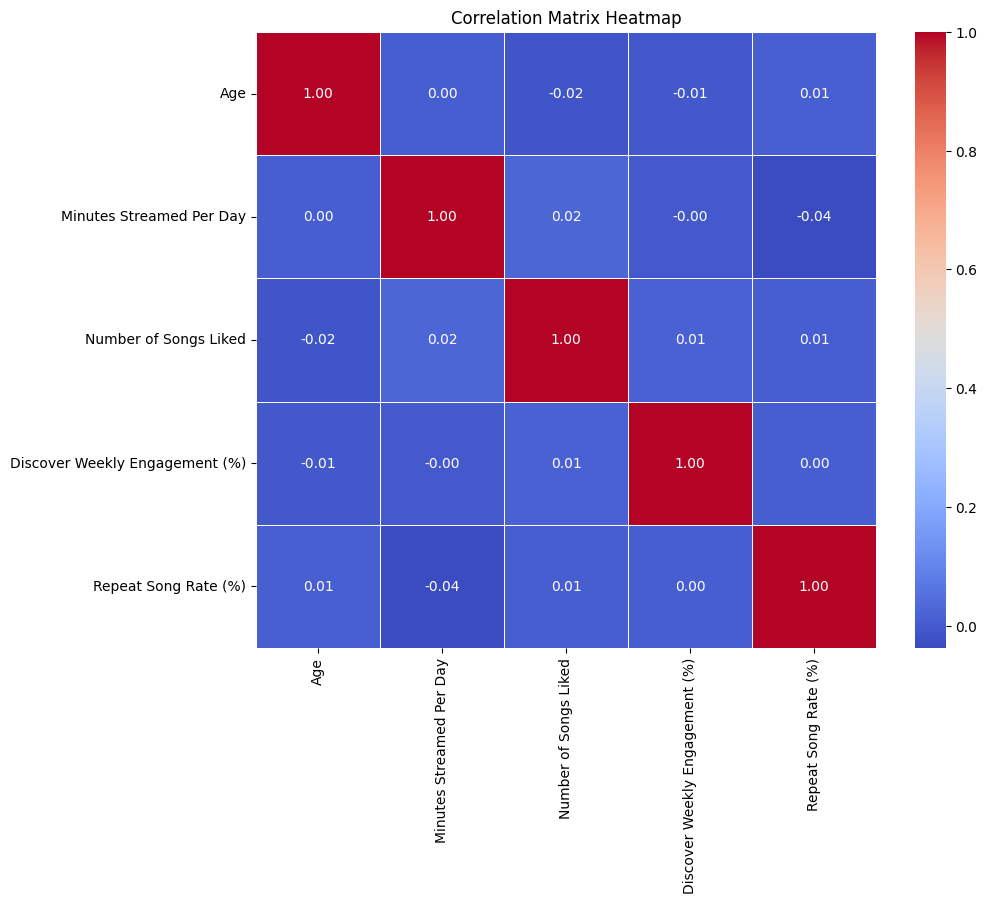

In [25]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Interpretation

Positive correlation values (close to 1) indicate a strong direct relationship, while negative values (close to -1) indicate an inverse relationship.
In this correlation matrix, all combinations of features have a correlation close to 0, indicating that there are no highly correlated features. So there are no features that need to be removed from the dataset.

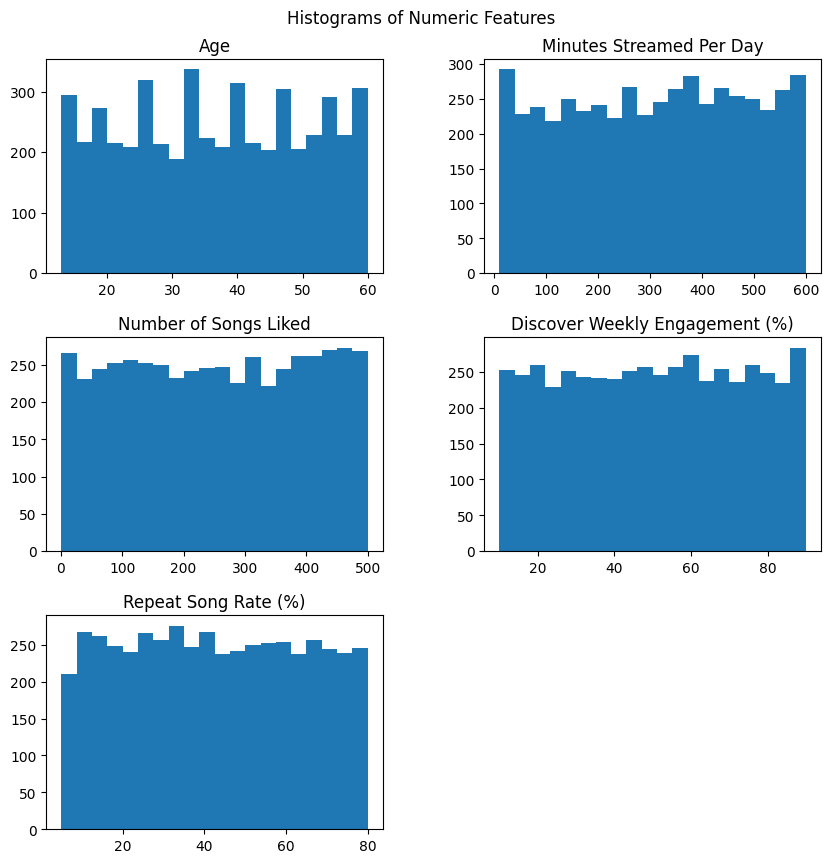

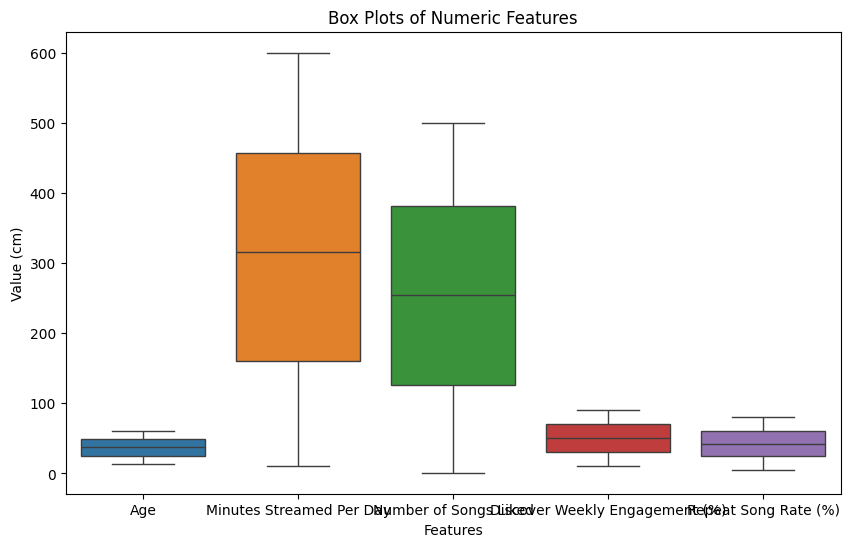

In [26]:

# Visualize distributions
df[numeric_columns].hist(bins=20, figsize=(10,10), grid=False)
plt.suptitle('Histograms of Numeric Features', y=0.93)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Value (cm)')
plt.show()

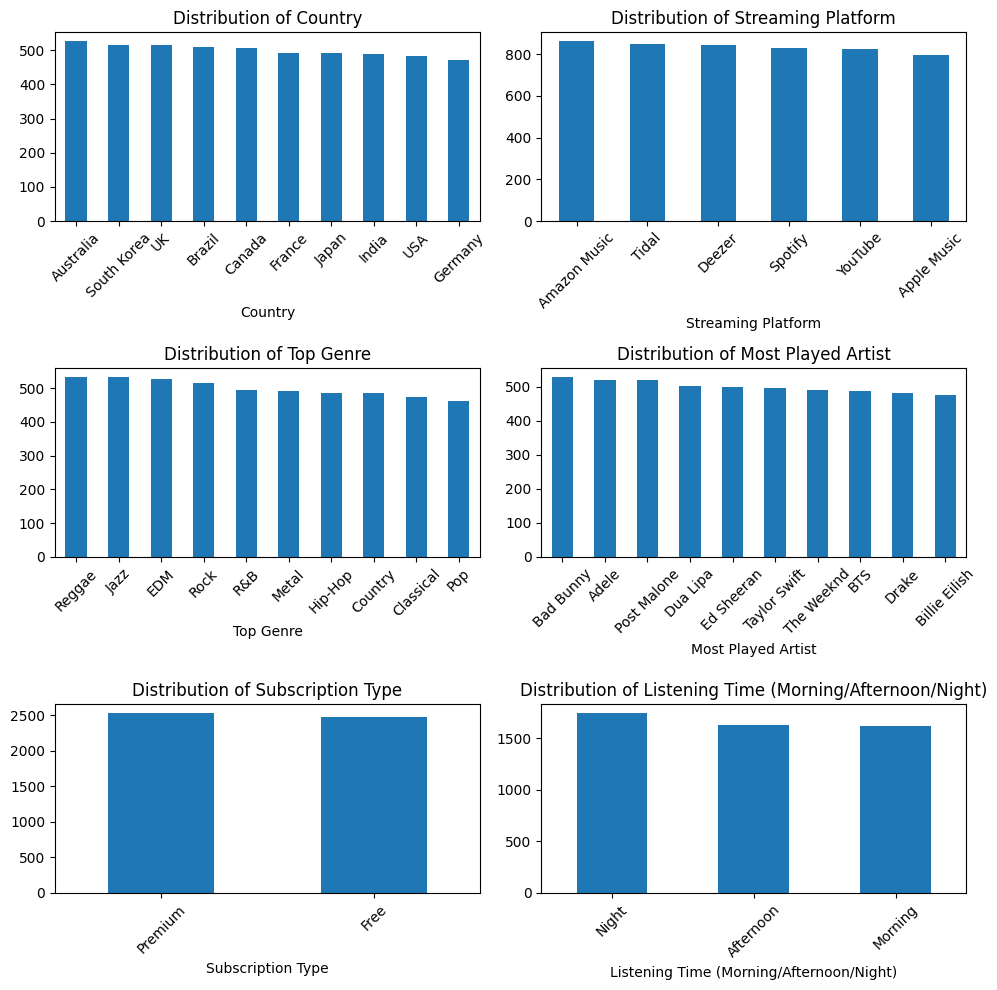

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
categorical_columns2 = categorical_columns[1:]
for i, col in enumerate(categorical_columns2):
    row = i // 2
    col_idx = i % 2
    df[col].value_counts().plot(kind='bar', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretation

#### ==== For Numerical Features ====
#### Histograms:

Histograms display the distribution of each numerical feature. All the numerical features in this dataset have a symmetric distribution. 

#### Box Plots:

Box plots highlight the spread of the data and potential outliers. All the numerical features in this dataset have no outliers. The box plot also shows that "Minutes Streamed Per Day" and "Number of Songs Liked" have a wider spread than the other numerical features.


#### ==== For Numerical Features ====
#### Histograms:

The histograms display the count of each value for each categorical feature. The feature value to the left of each feature's histogram indicates the value with the most frequent value that was calculated previously.

comment by Diya: this dataset is so well behaved!

## Questions we are asking:

* Are there any new features that can be derived from the existing ones?
* Is there a need to transform or scale any variables?
* Are there any variables that can be combined or decomposed?


In [38]:
# Feature Engineering
# Tiffany - add the new feature here!

### Interpretation

#### New Feature:


# Visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


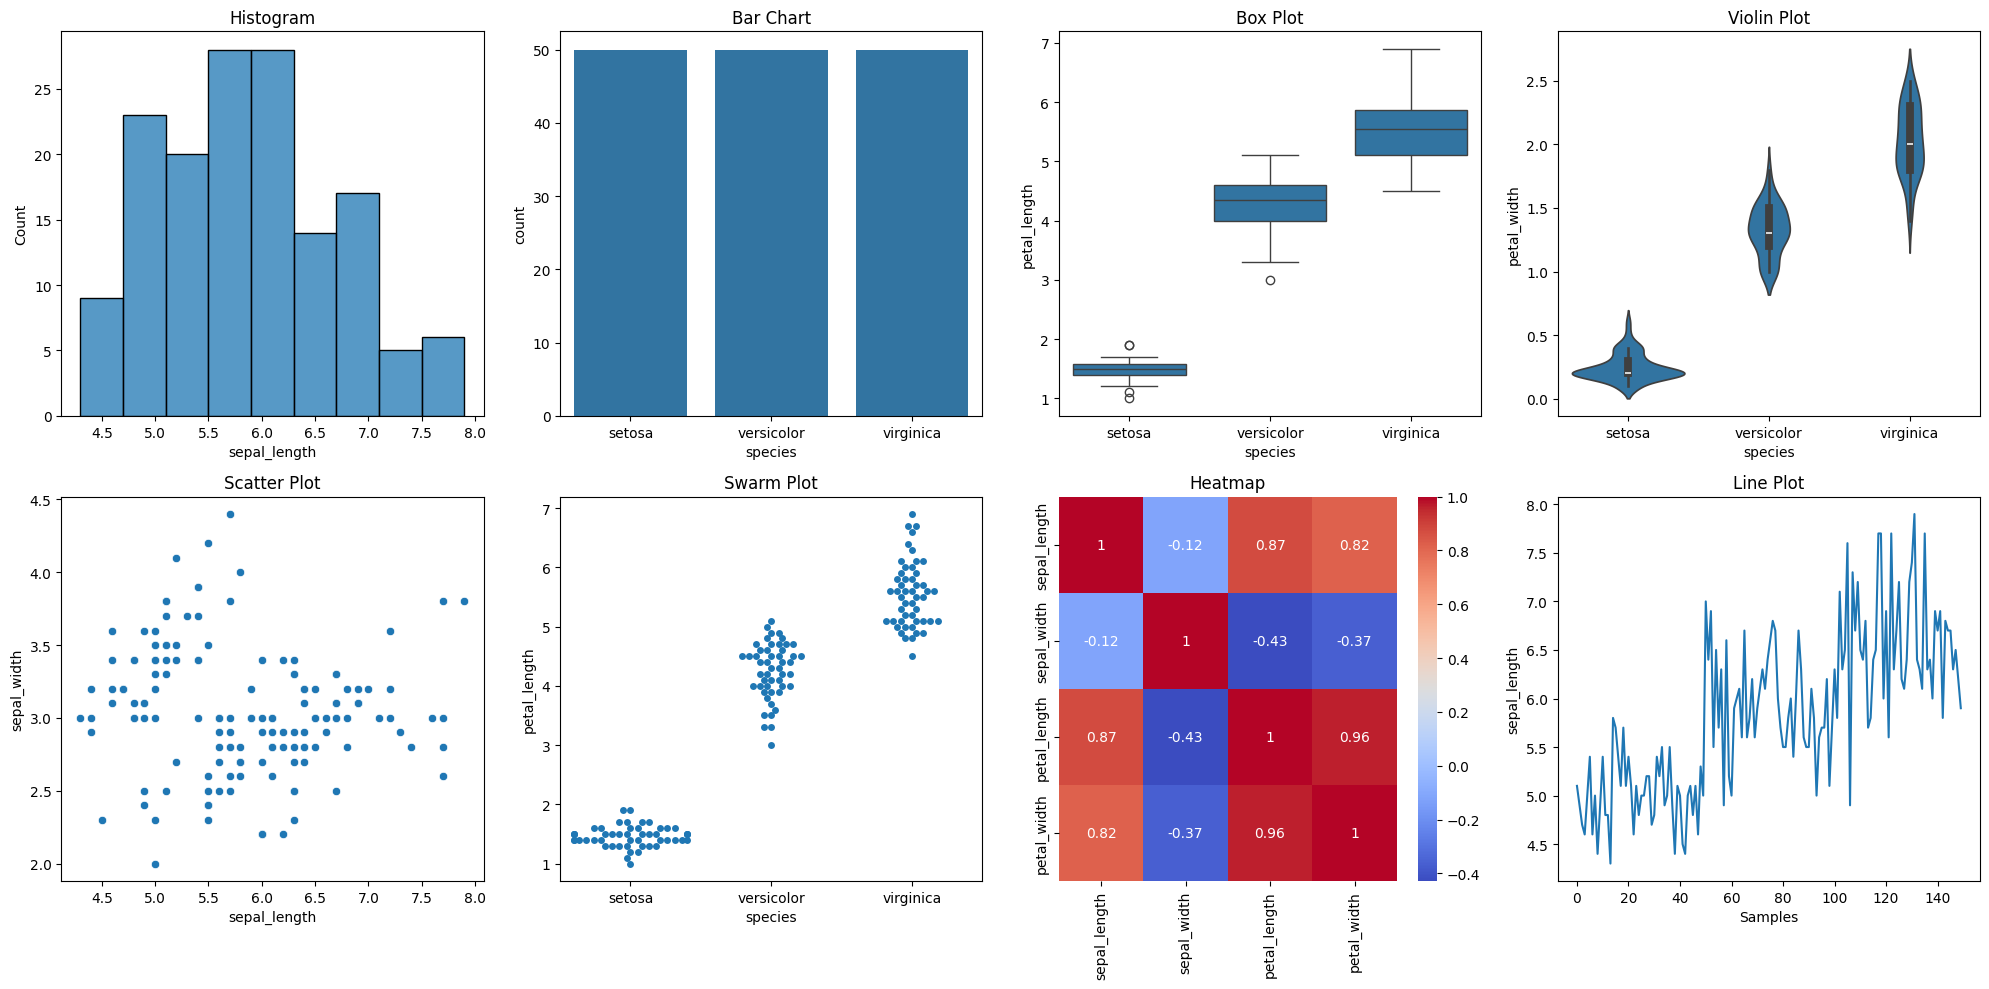

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram
sns.histplot(data=iris_df, x="sepal_length", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# Bar chart
sns.countplot(x="species", data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart')

# Box plot
sns.boxplot(x="species", y="petal_length", data=iris_df, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

# Violin plot
sns.violinplot(x="species", y="petal_width", data=iris_df, ax=axes[0, 3])
axes[0, 3].set_title('Violin Plot')

# Scatter plot
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot')

# Swarm plot
sns.swarmplot(x="species", y="petal_length", data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Swarm Plot')

# Heatmap
# Drop the species column before calculating the correlation matrix
corr_df = iris_df.drop("species", axis=1).corr()
sns.heatmap(corr_df, annot=True, cmap="coolwarm", ax=axes[1, 2])
axes[1, 2].set_title('Heatmap')

# Line plot
sns.lineplot(x=iris_df.index, y="sepal_length", data=iris_df, ax=axes[1, 3])
axes[1, 3].set_title('Line Plot')
axes[1, 3].set_xlabel("Samples")

# Adjust layout
plt.tight_layout()
plt.show()



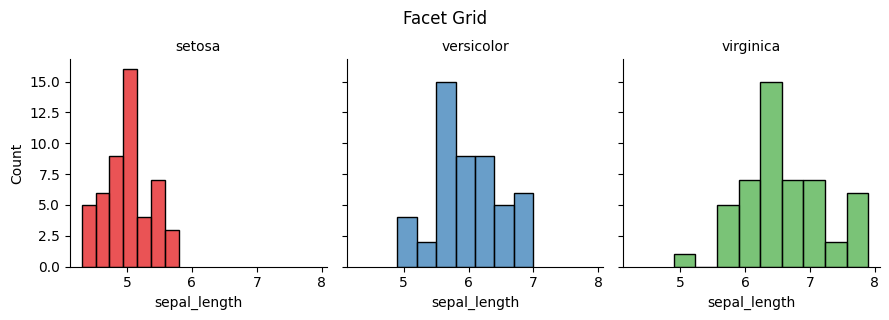

In [ ]:
# Facet grid
g = sns.FacetGrid(iris_df, col="species", hue="species", palette="Set1", col_wrap=3)
g.map(sns.histplot, "sepal_length")
g.set_titles("{col_name}")
g.fig.suptitle("Facet Grid", y=1.05)
plt.show()